<a href="https://colab.research.google.com/github/etmcrae/Project-6/blob/main/Project_6_Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Purpose**

This project will build an algorith to classify new, unseen images of cats and dogs by distinguishing between a picture of a cat, a picture of a a dog, and possible other pictures. Image classification was a difficult thing for machine learning, but deep learning provided a solution.


# **Data Import Training Data**

In [1]:
# import modules
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import requests
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
#x = images 1 means greyscale
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

response = requests.get(url)
response.raise_for_status()
x = pickle.loads(response.content)
print(x.shape)
#________________________________

# this is the yaxis for the x axis, y is the number and the x is the image.
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

response = requests.get(url)
response.raise_for_status()
y = pickle.loads(response.content)
y = np.array(y)
print(y.shape)

#_________________________________

url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

response = requests.get(url, stream=True)
response.raise_for_status()
img = Image.open(response.raw)
test = np.array(img)
print(test.shape)

(24946, 100, 100, 1)
(24946,)
(355, 300, 3)


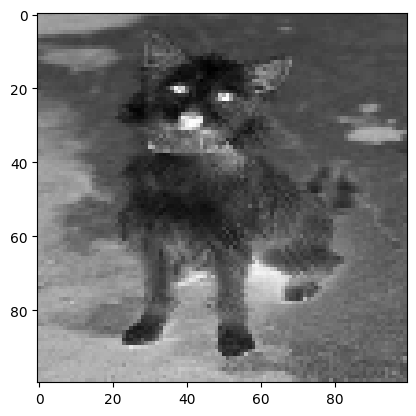

In [3]:
plt.imshow(x[0], cmap=plt.cm.gray_r)
plt.show()

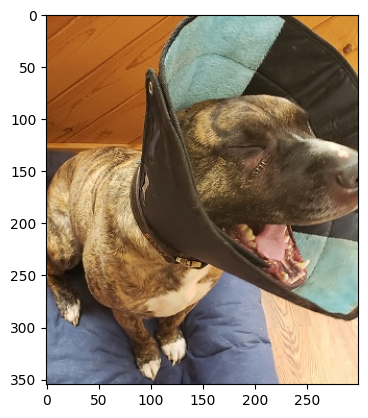

In [4]:
plt.imshow(test, cmap=plt.cm.gray_r)
plt.show()

# **Data Cleaning**

In [5]:
# scale pixel value to standardize them. they should all fall between 0 and 1 by dividing by 255
# This is necessary bc the data will be handled differently if you do not do it.
x2 = x/255

In [6]:
test2 = (test/255)

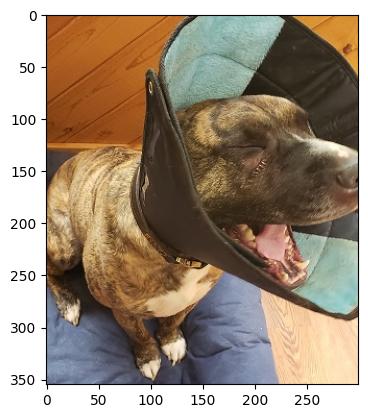

In [7]:
plt.imshow(test2, cmap=plt.cm.gray_r)
plt.show()

# **Exploratory Data Analysis**

In [8]:
#checking shape for x and y
print(x.shape) # 4 dimensions in x
print(y.shape)

(24946, 100, 100, 1)
(24946,)


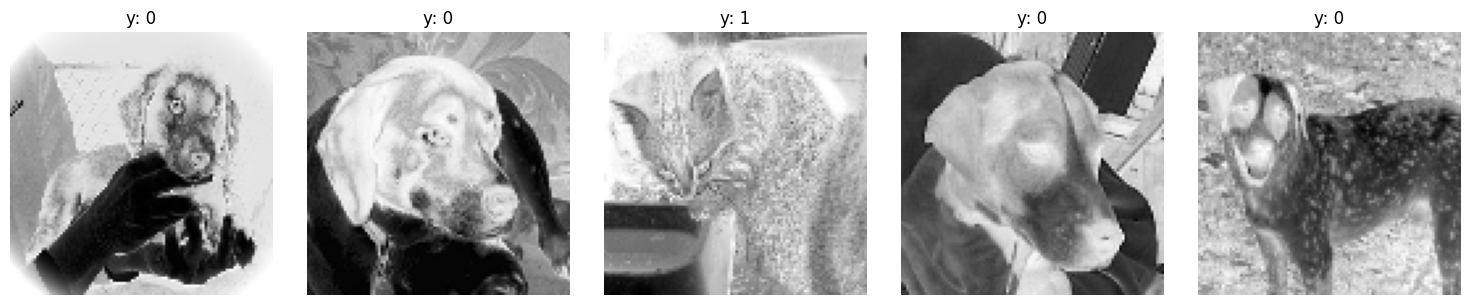

In [9]:
# Get 5 random images from x2
random_indices = np.random.choice(len(x2), 5, replace=False)
random_images = x2[random_indices]
random_y_values = y[random_indices]
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, img in enumerate(random_images):
    axes[i].imshow(img, cmap=plt.cm.gray_r)
    axes[i].set_title(f'y: {random_y_values[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Data Processing**

In [10]:
# split x and y into training and testing
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=44)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (19956, 100, 100, 1)
Shape of x_test: (4990, 100, 100, 1)
Shape of y_train: (19956,)
Shape of y_test: (4990,)


In [11]:
if x_train.ndim == 3:
    x_train2 = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test2 = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
elif x_train.ndim == 5 and x_train.shape[-1] == 1: # Handle the case where it's (samples, h, w, 1, 1)
    x_train2 = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test2 = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
else:
    # If the shape is unexpected, print a warning or error
    print(f"Warning: x_train has unexpected shape {x_train.shape}. Attempting to reshape.")
    # Assuming the last dimension is the problematic one and trying to remove it if it's size 1
    if x_train.shape[-1] == 1:
         x_train2 = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3])
         x_test2 = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3])
    else:
         raise ValueError(f"x_train has unhandled shape {x_train.shape}. Cannot proceed.")


print("Shape of x_train2:", x_train2.shape)
print("Shape of x_test2:", x_test2.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train2: (19956, 100, 100, 1)
Shape of x_test2: (4990, 100, 100, 1)
Shape of y_train: (19956,)
Shape of y_test: (4990,)


In [12]:
#sequential layers
model = Sequential()
model.add(
  Conv2D(
    name = "input",
    # Use the shape of one sample from x_train2, excluding the batch size
    # The shape is (height, width, channels)
    input_shape = x_train2.shape[1:],
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(
    MaxPooling2D(pool_size=(2,2))
)
model.add(
  Conv2D(
    name = "hidden1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

model.add(
    Flatten()
)


model.add(
  Dense(
    name = "output",
    units = 10,
    activation = 'softmax', #shouldve been sigmoid
  )
)

model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'],
)

model.fit(x_train2, y_train, epochs=8)
print(model.summary())
plot_model(model)


val_loss, val_acc = model.evaluate(x_test2, y_test)
print(val_loss)
print(val_acc)

Epoch 1/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 457s 730ms/step - accuracy: 0.5796 - loss: 0.6963
Epoch 2/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 517s 755ms/step - accuracy: 0.7486 - loss: 0.5068
Epoch 3/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 490s 735ms/step - accuracy: 0.7941 - loss: 0.4427
Epoch 4/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 512s 752ms/step - accuracy: 0.8210 - loss: 0.3970
Epoch 5/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 499s 747ms/step - accuracy: 0.8448 - loss: 0.3564
Epoch 6/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 497s 740ms/step - accuracy: 0.8696 - loss: 0.3040
Epoch 7/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 515s 761ms/step - accuracy: 0.8929 - loss: 0.2581
Epoch 8/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 552s 841ms/step - accuracy: 0.9145 - loss: 0.2165


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Conv2D)                │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │       338,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,128,416 (4.30 MB)

 Trainable params: 376,138 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 752,278 (2.87 MB)

None
156/156 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step - accuracy: 0.7792 - loss: 0.5430
0.5246977210044861
0.7847695350646973


156/156 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step


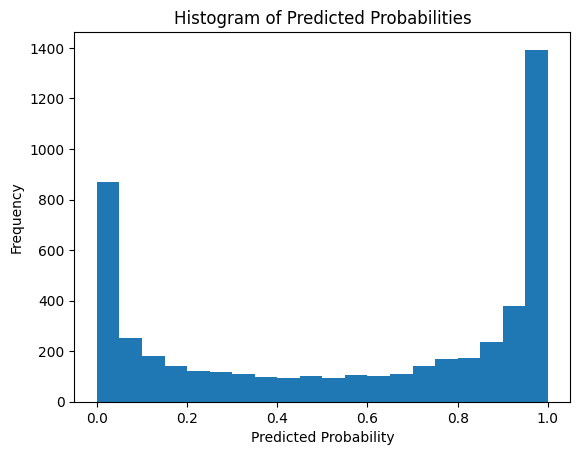

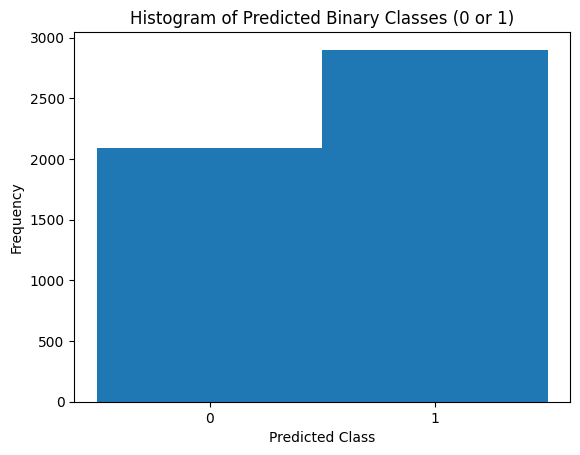

In [36]:
predictions = model.predict(x_test2)



plt.hist(predictions[:, 1], bins=20)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


binary_predicted_classes = (predictions[:, 1] > 0.5).astype(int)

plt.hist(binary_predicted_classes, bins=[-0.5, 0.5, 1.5])
plt.title('Histogram of Predicted Binary Classes (0 or 1)')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

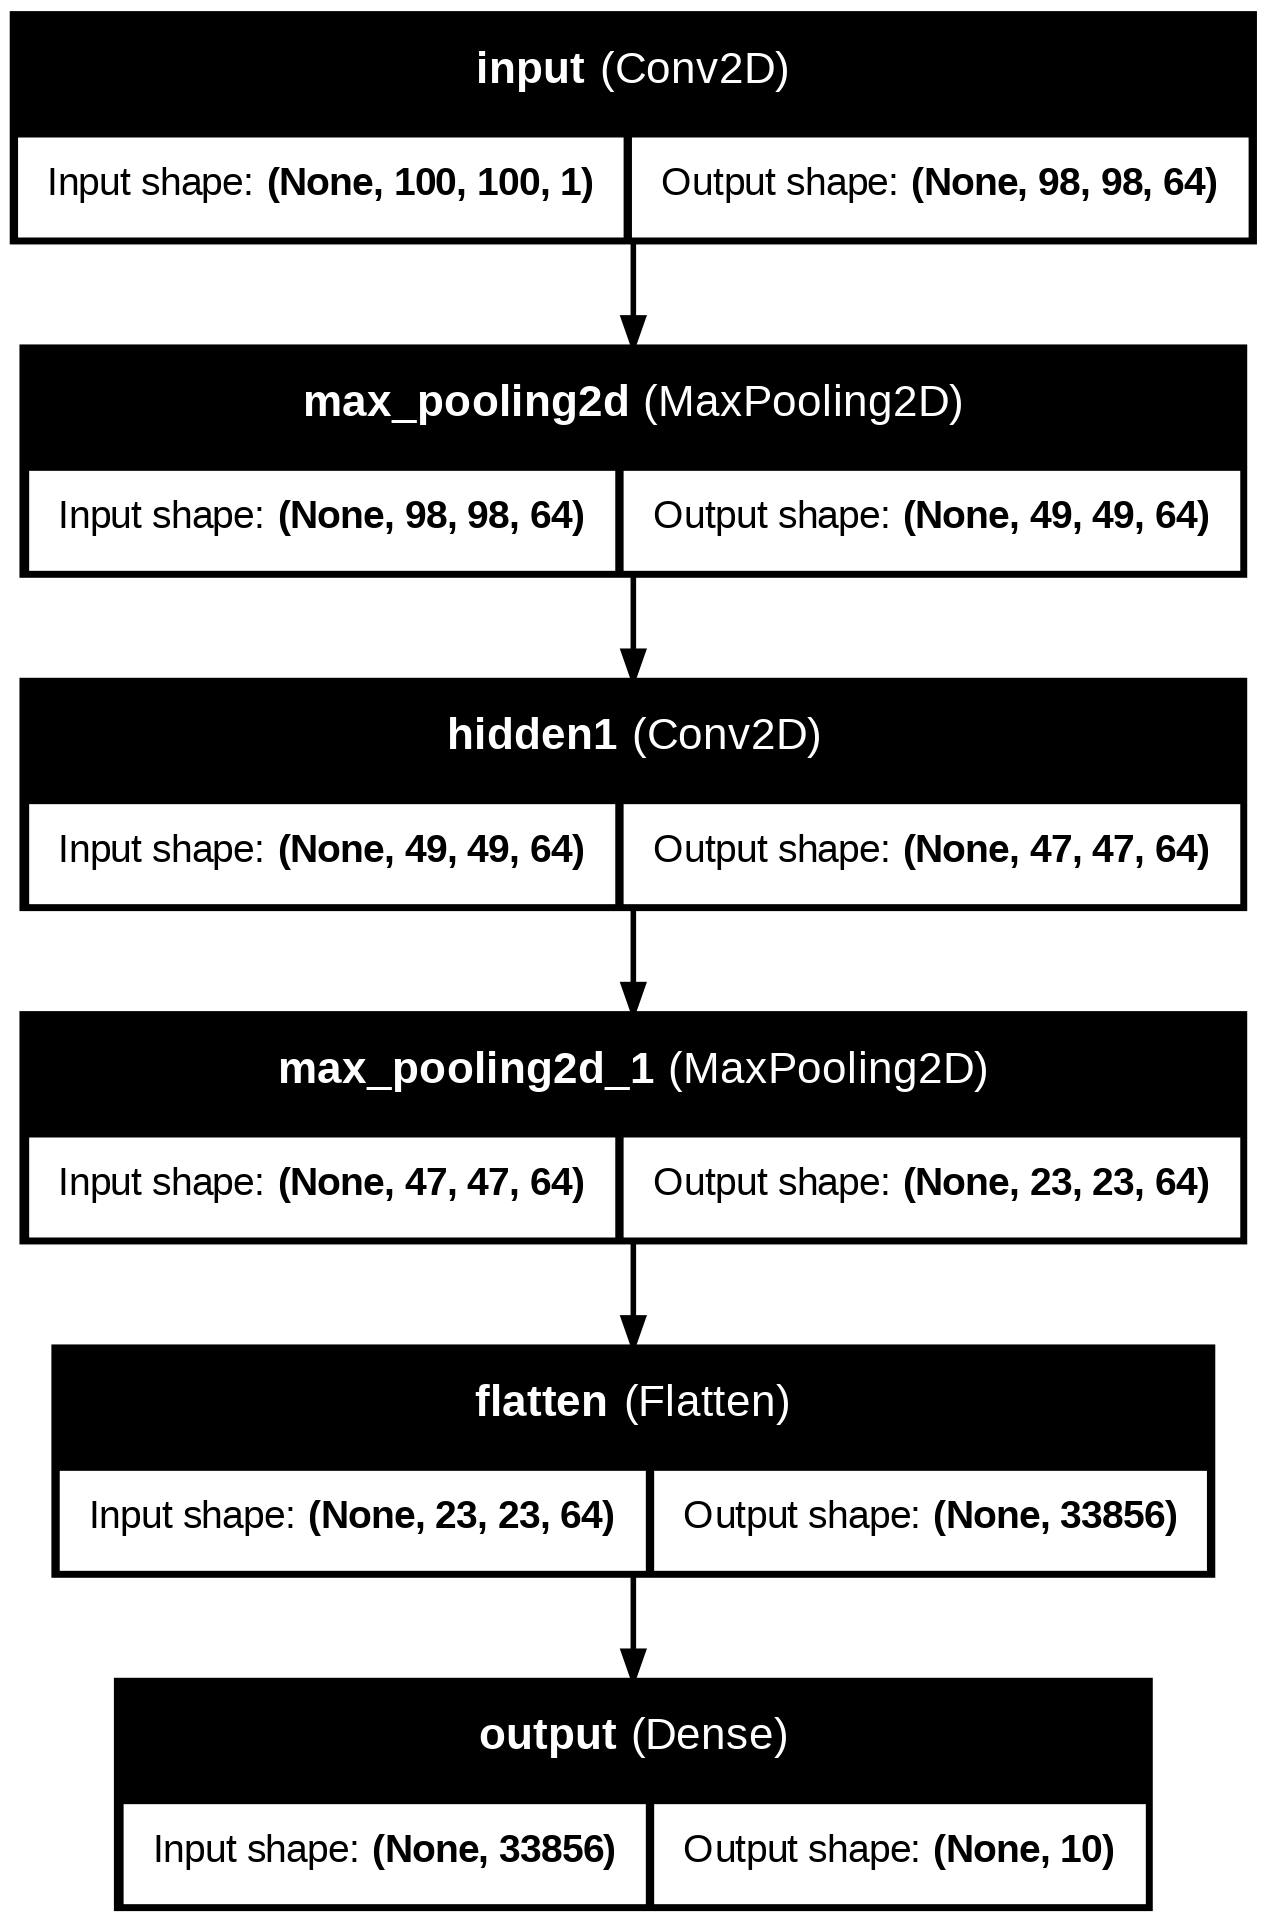

In [33]:

plot_model(model, show_shapes=True, show_layer_names=True)

In [32]:

print("Total Loss:", val_loss)
print("Total Accuracy:", val_acc)

Total Loss: 0.5246977210044861
Total Accuracy: 0.7847695350646973


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


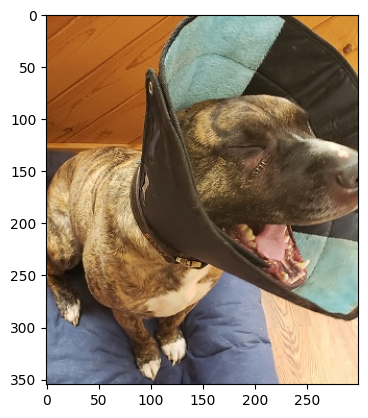

Prediction: Dog


In [25]:
import cv2
testing_gray = cv2.cvtColor(test, cv2.COLOR_RGB2GRAY)
testing_resized = cv2.resize(testing_gray, (100, 100))
testing_scaled = testing_resized / 255.0
testing = testing_scaled.reshape(1, 100, 100, 1)

prediction_test = model.predict(testing)
#print(testing)
plt.imshow(test, cmap=plt.cm.gray_r)
plt.show()

predicted_class_index = np.argmax(prediction_test[0])

# This condition assumes index 1 is Dog and index 0 is Cat. Adjust if necessary.
if predicted_class_index == 1:
    print("Prediction: Cat")
elif predicted_class_index == 0:
    print("Prediction: Dog")
else:
    print(f"Prediction: Other ({predicted_class_index})")


Saving 20240502_235215.jpg to 20240502_235215.jpg
Saving 20240920_164701.jpg to 20240920_164701.jpg
Saving 20240426_075536.jpg to 20240426_075536.jpg
Saving 20241002_142738.jpg to 20241002_142738.jpg
Saving 20241031_180721.jpg to 20241031_180721.jpg


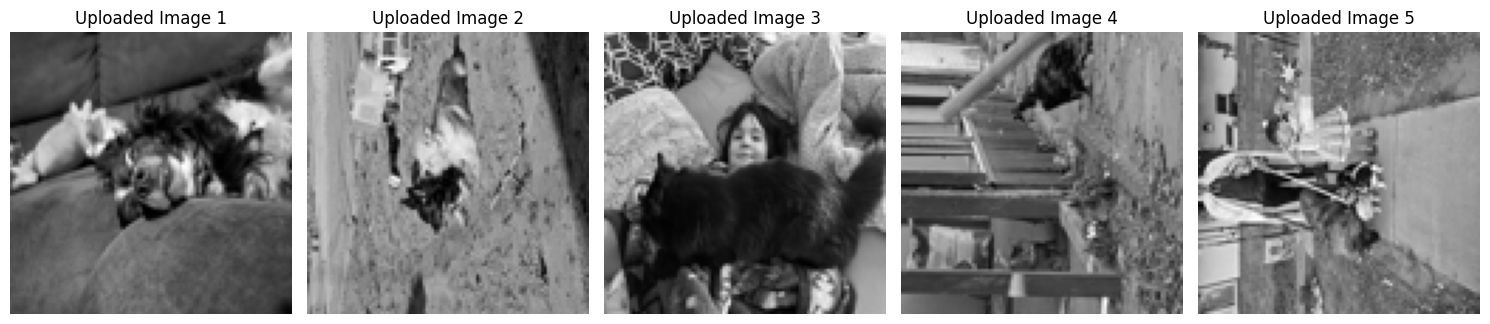


New images loaded and preprocessed. Shape: (5, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[3.20865773e-02 9.67913449e-01 1.28103450e-16 1.30157028e-16
  9.92557310e-17 1.34081332e-16 1.03274227e-16 1.13644134e-16
  1.18594340e-16 1.26216538e-16]
 [8.68629038e-01 1.31370887e-01 8.21795201e-11 9.80581658e-11
  7.93072968e-11 9.52341331e-11 9.36232758e-11 8.58594862e-11
  8.39340888e-11 9.69359107e-11]
 [8.78192008e-01 1.21807963e-01 1.07150229e-15 9.19681057e-16
  8.69757147e-16 9.12252472e-16 8.91698371e-16 9.86203319e-16
  8.98232701e-16 8.26916444e-16]
 [8.91284823e-01 1.08715124e-01 3.36211229e-13 3.43700112e-13
  2.74297702e-13 3.25808038e-13 3.16066617e-13 3.16344010e-13
  3.46139512e-13 3.29113310e-13]
 [4.74380046e-01 5.25619924e-01 1.32474327e-13 1.82726542e-13
  1.61965818e-13 1.65628443e-13 1.81273087e-13 1.53978338e-13
  1.58785257e-13 1.77706604e-13]]


In [26]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

image_list = []
for filename in uploaded.keys():
    img = Image.open(filename)
    img_gray = img.convert('L').resize((100, 100))
    img_array = np.array(img_gray)
    image_list.append(img_array)


if image_list:
    new_images = np.stack(image_list)


    fig, axes = plt.subplots(1, len(new_images), figsize=(15, 5))
    if len(new_images) == 1:
        axes.imshow(new_images[0], cmap='gray')
        axes.set_title(f'Uploaded Image')
        axes.axis('off')
    else:
        for i, img_arr in enumerate(new_images):
            axes[i].imshow(img_arr, cmap='gray')
            axes[i].set_title(f'Uploaded Image {i+1}')
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()

    new_images_processed = new_images.reshape(new_images.shape[0], 100, 100, 1) / 255.0

    print("\nNew images loaded and preprocessed. Shape:", new_images_processed.shape)

    predictions_new = model.predict(new_images_processed)
    print(predictions_new)

else:
    print("No files uploaded.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


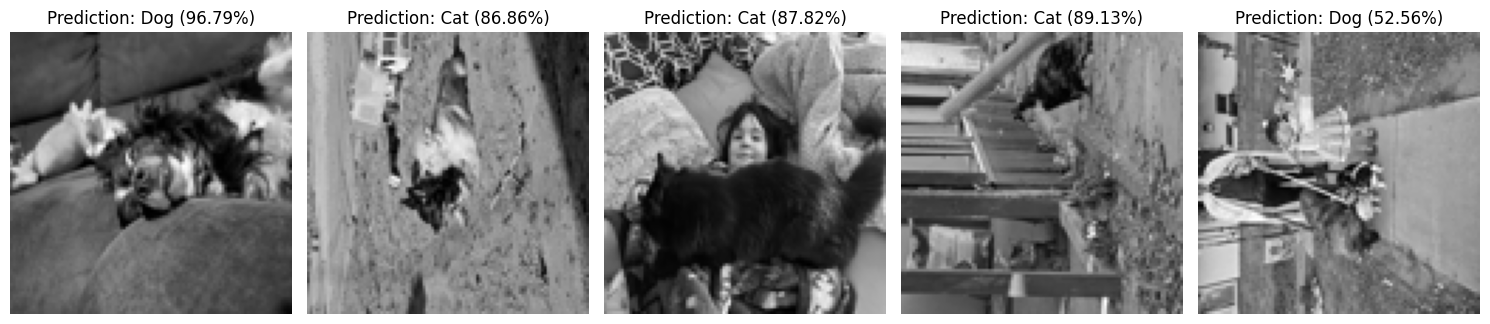


Predictions for uploaded images:
Image 1: Predicted Cat with 96.79% confidence
Image 2: Predicted Dog with 86.86% confidence
Image 3: Predicted Dog with 87.82% confidence
Image 4: Predicted Dog with 89.13% confidence
Image 5: Predicted Cat with 52.56% confidence


In [29]:
if image_list:
    new_images = np.stack(image_list)


    fig, axes = plt.subplots(1, len(new_images), figsize=(15, 5))

    new_images_processed = new_images.reshape(new_images.shape[0], 100, 100, 1) / 255.0
    predictions_new = model.predict(new_images_processed)

    for i, img_arr in enumerate(new_images):
        # Display the image
        if len(new_images) == 1:
            ax = axes
        else:
            ax = axes[i]

        ax.imshow(img_arr, cmap='gray')
        ax.axis('off') # Hide axes ticks

        # Determine prediction text
        predicted_class_index = np.argmax(predictions_new[i])
        confidence = predictions_new[i][predicted_class_index] * 100

        if predicted_class_index == 1:
            prediction_text = f'Prediction: Dog ({confidence:.2f}%)'
        elif predicted_class_index == 0:
            prediction_text = f'Prediction: Cat ({confidence:.2f}%)'
        else:
            prediction_text = f'Prediction: Other ({predicted_class_index}) ({confidence:.2f}%)'

        ax.set_title(prediction_text)

    plt.tight_layout()
    plt.show()

    print("\nPredictions for uploaded images:")
    for i, prediction in enumerate(predictions_new):
        predicted_class_index = np.argmax(prediction)
        confidence = prediction[predicted_class_index] * 100
        if predicted_class_index == 1:
            print(f"Image {i+1}: Predicted Cat with {confidence:.2f}% confidence")
        elif predicted_class_index == 0:
            print(f"Image {i+1}: Predicted Dog with {confidence:.2f}% confidence")
        else:
             print(f"Image {i+1}: Predicted Other ({predicted_class_index}) with {confidence:.2f}% confidence")


else:
    print("No files uploaded.")

Saving 20241227_095734.jpg to 20241227_095734.jpg
Saving 20250503_122434.jpg to 20250503_122434.jpg
Saving 20250509_125606.jpg to 20250509_125606.jpg
Saving 20250513_065912.jpg to 20250513_065912.jpg


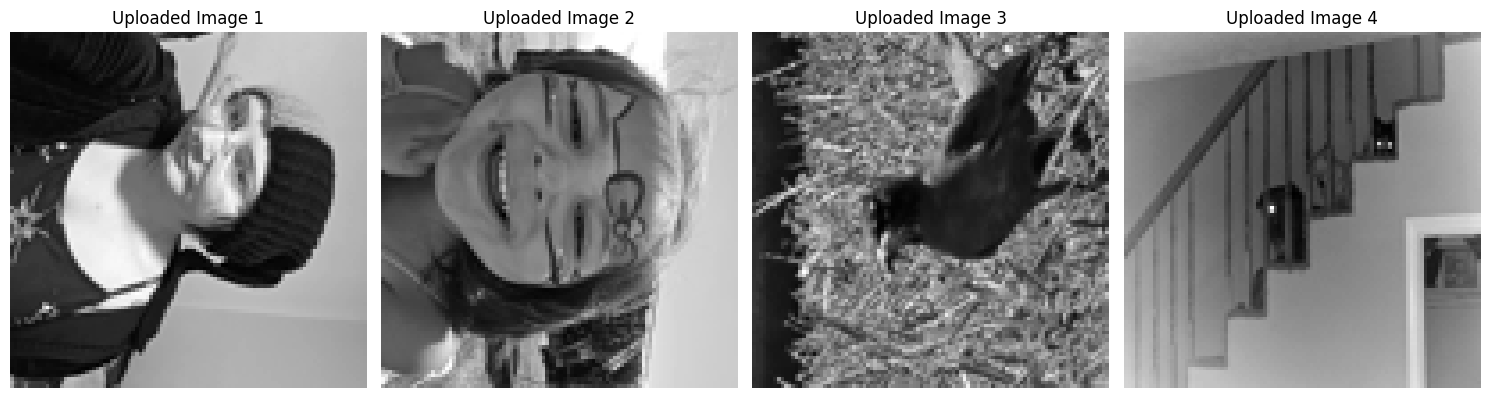


New images loaded and preprocessed. Shape: (4, 100, 100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[8.2144606e-01 1.7855395e-01 8.4857807e-19 7.0911904e-19 7.5144013e-19
  8.0055713e-19 9.8450675e-19 8.2334596e-19 6.8840380e-19 7.1793239e-19]
 [8.9526618e-01 1.0473384e-01 9.6567202e-15 1.0419122e-14 1.0715388e-14
  1.0508414e-14 1.0249648e-14 9.6864934e-15 1.0661323e-14 1.0067136e-14]
 [2.9645693e-01 7.0354301e-01 3.5577440e-14 3.9693133e-14 3.4894166e-14
  3.8869830e-14 3.9868635e-14 3.7073866e-14 3.6662706e-14 3.9313842e-14]
 [6.4770043e-02 9.3476391e-01 5.6170640e-05 6.2282408e-05 5.3526888e-05
  6.0794864e-05 5.9523543e-05 5.5313300e-05 5.8070094e-05 6.0276903e-05]]


In [30]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

image_list = []
for filename in uploaded.keys():
    img = Image.open(filename)
    img_gray = img.convert('L').resize((100, 100))
    img_array = np.array(img_gray)
    image_list.append(img_array)


if image_list:
    new_images = np.stack(image_list)


    fig, axes = plt.subplots(1, len(new_images), figsize=(15, 5))
    if len(new_images) == 1:
        axes.imshow(new_images[0], cmap='gray')
        axes.set_title(f'Uploaded Image')
        axes.axis('off')
    else:
        for i, img_arr in enumerate(new_images):
            axes[i].imshow(img_arr, cmap='gray')
            axes[i].set_title(f'Uploaded Image {i+1}')
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()

    new_images_processed = new_images.reshape(new_images.shape[0], 100, 100, 1) / 255.0

    print("\nNew images loaded and preprocessed. Shape:", new_images_processed.shape)

    predictions_new = model.predict(new_images_processed)
    print(predictions_new)

else:
    print("No files uploaded.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


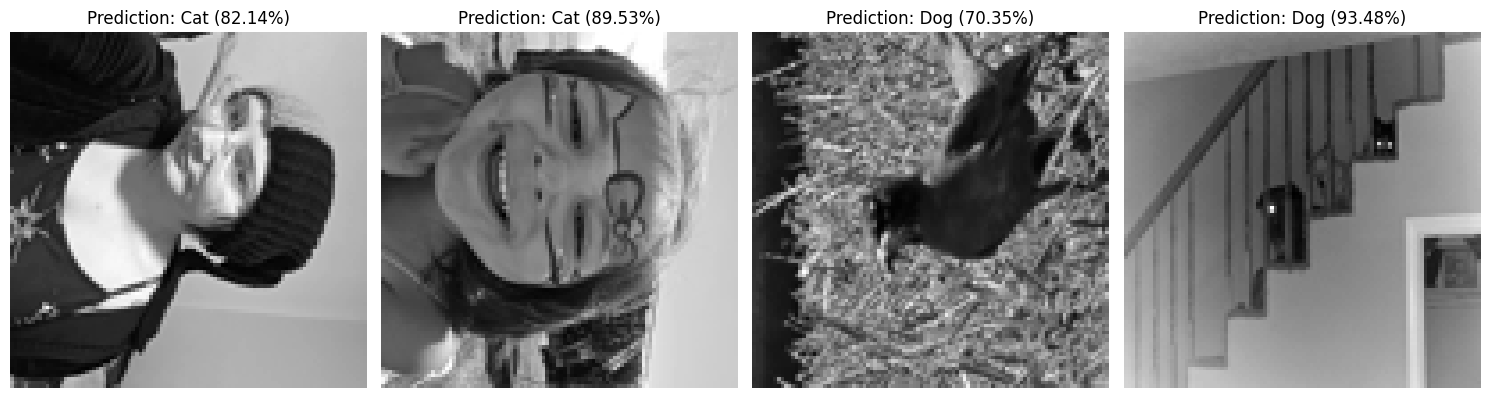


Predictions for uploaded images:
Image 1: Predicted Dog with 82.14% confidence
Image 2: Predicted Dog with 89.53% confidence
Image 3: Predicted Cat with 70.35% confidence
Image 4: Predicted Cat with 93.48% confidence


In [31]:
if image_list:
    new_images = np.stack(image_list)


    fig, axes = plt.subplots(1, len(new_images), figsize=(15, 5))

    new_images_processed = new_images.reshape(new_images.shape[0], 100, 100, 1) / 255.0
    predictions_new = model.predict(new_images_processed)

    for i, img_arr in enumerate(new_images):
        # Display the image
        if len(new_images) == 1:
            ax = axes
        else:
            ax = axes[i]

        ax.imshow(img_arr, cmap='gray')
        ax.axis('off') # Hide axes ticks

        # Determine prediction text
        predicted_class_index = np.argmax(predictions_new[i])
        confidence = predictions_new[i][predicted_class_index] * 100

        if predicted_class_index == 1:
            prediction_text = f'Prediction: Dog ({confidence:.2f}%)'
        elif predicted_class_index == 0:
            prediction_text = f'Prediction: Cat ({confidence:.2f}%)'
        else:
            prediction_text = f'Prediction: Other ({predicted_class_index}) ({confidence:.2f}%)'

        ax.set_title(prediction_text)

    plt.tight_layout()
    plt.show()

    print("\nPredictions for uploaded images:")
    for i, prediction in enumerate(predictions_new):
        predicted_class_index = np.argmax(prediction)
        confidence = prediction[predicted_class_index] * 100
        if predicted_class_index == 1:
            print(f"Image {i+1}: Predicted Cat with {confidence:.2f}% confidence")
        elif predicted_class_index == 0:
            print(f"Image {i+1}: Predicted Dog with {confidence:.2f}% confidence")
        else:
             print(f"Image {i+1}: Predicted Other ({predicted_class_index}) with {confidence:.2f}% confidence")


else:
    print("No files uploaded.")

# **Communicate Results**

Dogs are 0 and cats are 1